# STOCK MARKET ANALYSIS PROJECT NOTEBOOK

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from datetime import datetime

This will import the necessry libraries we need for our project on stock market analysis

Now we need to fetch stock from the specific company we now choose, for example in this we shall choose AAPL which is Apple's Stock Symbol

In [2]:
import yfinance as yf
from datetime import datetime

stock_symbol = "NTWK"  # Replace with the desired stock symbol

start_date = datetime(2023, 3, 1)
end_date = datetime.now()

stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

print(stock_data.head())

[*********************100%%**********************]  1 of 1 completed

            Open  High   Low  Close  Adj Close  Volume
Date                                                  
2023-03-01  2.71  2.75  2.70   2.70       2.70    3900
2023-03-02  2.70  2.75  2.62   2.70       2.70   15700
2023-03-03  2.72  2.76  2.72   2.76       2.76    2800
2023-03-06  2.72  2.90  2.66   2.66       2.66   36700
2023-03-07  2.76  2.79  2.65   2.66       2.66    6000


This will fetch stock data from our selected company input the prices and all the data we can get

## Visualizing Stock Prices
# Now, we'll create a line plot to visualize the closing prices of the stock over time.

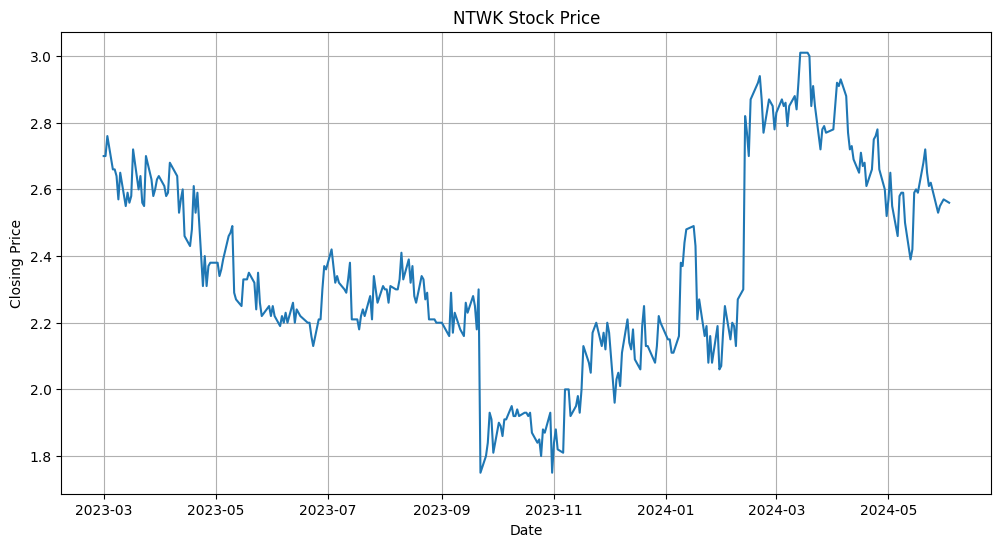

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'])
plt.title(f"{stock_symbol} Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True)
plt.show()

The plot shows the evolution of the stock's closing price over the specified date range. We can observe the trends, fluctuations, and any significant events that may have impacted the stock price.

# Visualizing Stock Prices with Moving Averages

In this section, we will extend the stock price visualization by adding moving averages to the plot. Moving averages are commonly used technical indicators that help smooth out price fluctuations and identify trends.

# Calculating Moving Averages
We calculate the 50-day and 200-day moving averages of the stock's closing prices using the rolling() function from pandas.

The window parameter specifies the number of days to consider for each moving average. The calculated moving averages are then added as new columns to the stock_data DataFrame.

# Plotting Stock Prices with Moving Averages
Now, let's create a plot that includes the stock's closing prices along with the moving averages

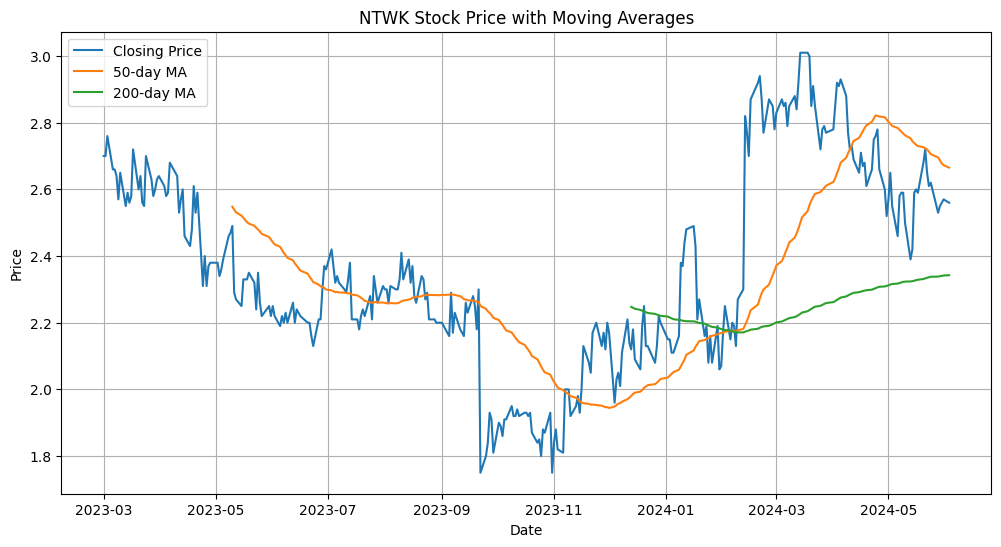

In [4]:
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['MA200'] = stock_data['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label="Closing Price")
plt.plot(stock_data['MA50'], label="50-day MA")
plt.plot(stock_data['MA200'], label="200-day MA")
plt.title(f"{stock_symbol} Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

This code generates a plot with the following elements:

The closing prices of the stock are plotted as a line.
The 50-day moving average is plotted as a separate line.
The 200-day moving average is plotted as another line.
The plot title includes the stock symbol.
The x-axis represents the date, and the y-axis represents the price.
A legend is added to identify each line.
A grid is included for better readability.

# Interpreting the Moving Averages Plot

The moving averages plot provides valuable insights into the stock's price movement and trends:

The 50-day moving average (MA50) is a short-term trend indicator. When the stock price is above the MA50, it suggests a bullish trend, and when the price is below the MA50, it suggests a bearish trend.
The 200-day moving average (MA200) is a long-term trend indicator. It helps identify the overall market sentiment. When the stock price is above the MA200, it indicates a bullish market, and when the price is below the MA200, it indicates a bearish market.
Crossovers between the stock price and the moving averages can signal potential trend reversals or confirmations. For example, when the stock price crosses above the MA50 or MA200, it may indicate a bullish signal, while crossing below may suggest a bearish signal.

# Calculating daily and accumlative returns

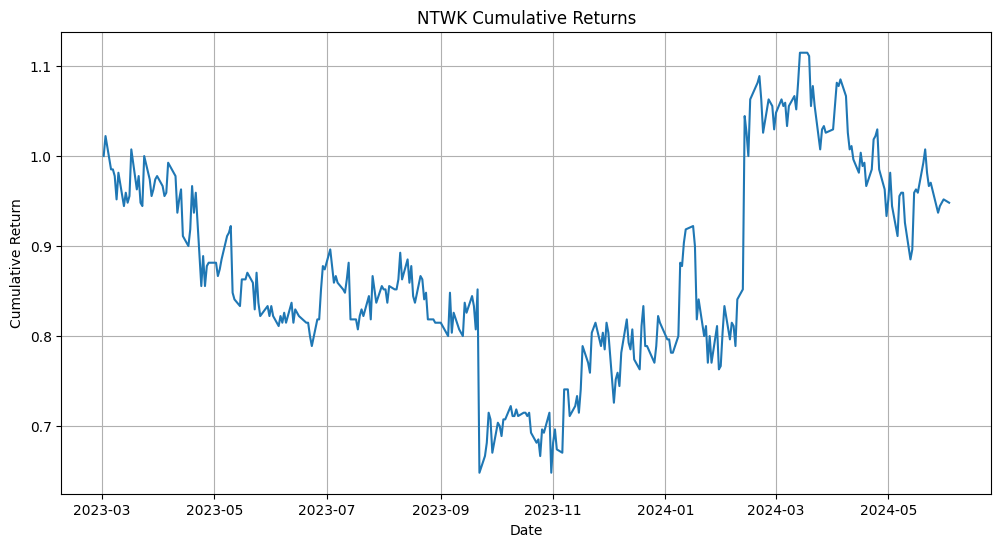

In [5]:
# Calculate daily returns
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

# Calculate cumulative returns
stock_data['Cumulative_Return'] = (1 + stock_data['Daily_Return']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Cumulative_Return'])
plt.title(f"{stock_symbol} Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.show()

# Measuring volatility using rolling standard deviation

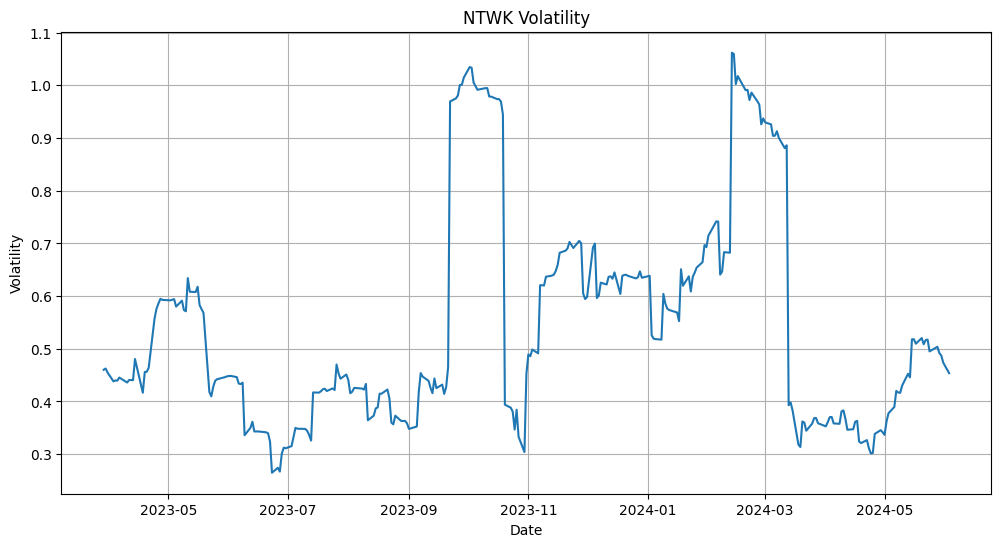

In [6]:
import numpy as np

# Calculate rolling standard deviation (volatility) with a 20-day window
stock_data['Volatility'] = stock_data['Daily_Return'].rolling(window=20).std() * np.sqrt(252)

# Plot volatility
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Volatility'])
plt.title(f"{stock_symbol} Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(True)
plt.show()

# Comparing the performance of multiple stocks

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


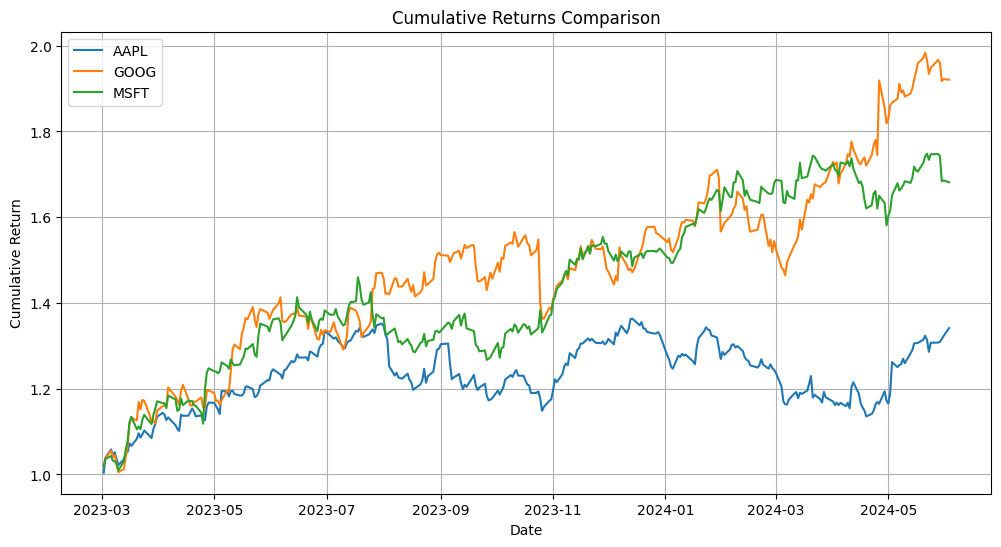

In [7]:
import pandas as pd

# Select multiple stock symbols
stock_symbols = ['AAPL', 'GOOG', 'MSFT']

# Fetch stock data for each symbol
stock_data = {}
for symbol in stock_symbols:
    stock_data[symbol] = yf.download(symbol, start=start_date, end=end_date)

# Calculate daily returns for each stock
returns = pd.DataFrame()
for symbol in stock_symbols:
    returns[symbol] = stock_data[symbol]['Close'].pct_change()

# Plot cumulative returns for each stock
plt.figure(figsize=(12, 6))
for symbol in stock_symbols:
    plt.plot((1 + returns[symbol]).cumprod(), label=symbol)
plt.title("Cumulative Returns Comparison")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()

In this example, we fetch stock data for multiple symbols using a loop and store them in a dictionary. We then calculate the daily returns for each stock and store them in a DataFrame. Finally, we plot the cumulative returns for each stock on the same graph for comparison.

# Conclusion

In this notebook, we demonstrated how to fetch stock data using the `yfinance` library, visualize the stock prices using `matplotlib`, and discussed potential further analyses that can be conducted on the data.

# Fundamental Analysis

[*********************100%%**********************]  1 of 1 completed


P/E Ratio: 6.736842
P/B Ratio: 0.8271405
Debt-to-Equity Ratio: nan


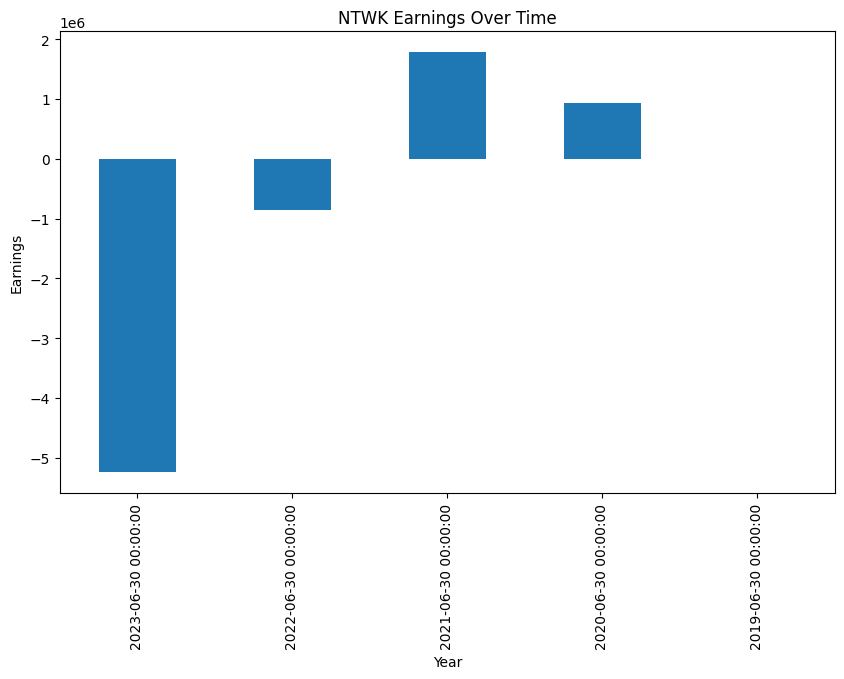

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np

# Fetch stock data
stock_symbol = "NTWK"  # Replace with the desired stock symbol
stock_data = yf.download(stock_symbol, start="2020-01-01", end="2023-05-27")

# Fetch financial data
ticker = yf.Ticker(stock_symbol)
financials = ticker.financials
balance_sheet = ticker.balance_sheet

# Calculate financial ratios
pe_ratio = ticker.info['forwardPE']
pb_ratio = ticker.info['priceToBook']

# Check if 'Total Liab' exists in the balance sheet
if 'Total Liab' in balance_sheet.index:
    total_liabilities = balance_sheet.loc['Total Liab'][0]
else:
    # Find the closest match for total liabilities
    liabilities_labels = ['Total Liabilities', 'TotalLiab', 'Liabilities']
    for label in liabilities_labels:
        if label in balance_sheet.index:
            total_liabilities = balance_sheet.loc[label][0]
            break
    else:
        total_liabilities = np.nan

# Check if 'Total Stockholder Equity' exists in the balance sheet
if 'Total Stockholder Equity' in balance_sheet.index:
    total_equity = balance_sheet.loc['Total Stockholder Equity'][0]
else:
    # Find the closest match for total stockholder equity
    equity_labels = ['Total Equity', 'TotalEquity', 'StockholdersEquity']
    for label in equity_labels:
        if label in balance_sheet.index:
            total_equity = balance_sheet.loc[label][0]
            break
    else:
        total_equity = np.nan

# Calculate debt-to-equity ratio
if pd.notnull(total_liabilities) and pd.notnull(total_equity) and total_equity != 0:
    debt_to_equity = total_liabilities / total_equity
else:
    debt_to_equity = np.nan

# Print financial ratios
print(f"P/E Ratio: {pe_ratio}")
print(f"P/B Ratio: {pb_ratio}")
print(f"Debt-to-Equity Ratio: {debt_to_equity}")

# Fetch earnings data from financials
earnings_data = financials.loc['Net Income']

# Plot earnings over time
earnings_data.plot(kind='bar', figsize=(10, 6))
plt.title(f"{stock_symbol} Earnings Over Time")
plt.xlabel("Year")
plt.ylabel("Earnings")
plt.show()

# Machine Learning and Predictive Modelling

This will download the required VADER library for this project

In [1]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ibrahimpuri/nltk_data...


True

In [9]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Fetch stock data
stock_symbol = "NTWK"
stock_data = yf.download(stock_symbol, start="2020-01-01", end="2024-05-27")

# Prepare data for ARIMA
data = stock_data['Close'].values

# Train ARIMA model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()

# Make future predictions
predictions = model_fit.forecast(steps=30)

# Print the predictions
print("Future Predictions:")
print(predictions)

# Perform sentiment analysis on news articles
news_data = [
    "Apple reports record-breaking revenue in latest earnings call.",
    "Concerns over Apple's supply chain disruptions.",
    "Apple launches new iPhone with advanced features.",
    "Mixed reviews for Apple's latest software update."
]

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Analyze sentiment for each news article
sentiment_scores = []
for article in news_data:
    sentiment = analyzer.polarity_scores(article)
    sentiment_scores.append(sentiment["compound"])

# Create a DataFrame with news articles and sentiment scores
sentiment_df = pd.DataFrame({"Article": news_data, "Sentiment Score": sentiment_scores})

# Print the sentiment analysis results
print("Sentiment Analysis Results:")
print(sentiment_df)

[*********************100%%**********************]  1 of 1 completed

Future Predictions:
[2.61930477 2.6193433  2.61934116 2.61934128 2.61934128 2.61934128
 2.61934128 2.61934128 2.61934128 2.61934128 2.61934128 2.61934128
 2.61934128 2.61934128 2.61934128 2.61934128 2.61934128 2.61934128
 2.61934128 2.61934128 2.61934128 2.61934128 2.61934128 2.61934128
 2.61934128 2.61934128 2.61934128 2.61934128 2.61934128 2.61934128]
Sentiment Analysis Results:
                                             Article  Sentiment Score
0  Apple reports record-breaking revenue in lates...             0.00
1    Concerns over Apple's supply chain disruptions.            -0.34
2  Apple launches new iPhone with advanced features.             0.25
3  Mixed reviews for Apple's latest software update.             0.00


In [12]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from datetime import datetime, timedelta

def fetch_stock_data(stock_symbol, start_date, end_date):
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    return stock_data

def perform_arima_forecast(data, steps):
    model = ARIMA(data, order=(1, 1, 1))
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=steps)
    return predictions

def perform_sentiment_analysis(news_data):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = []
    for article in news_data:
        sentiment = analyzer.polarity_scores(article)
        sentiment_scores.append(sentiment["compound"])
    sentiment_df = pd.DataFrame({"Article": news_data, "Sentiment Score": sentiment_scores})
    return sentiment_df

# Set the stock symbol and date range
stock_symbol = "AAPL"
end_date = datetime.now().strftime("%Y-%m-%d")
start_date = (datetime.now() - timedelta(days=365)).strftime("%Y-%m-%d")

# Fetch the latest stock data
stock_data = fetch_stock_data(stock_symbol, start_date, end_date)

# Perform ARIMA forecast
data = stock_data['Close'].values
predictions = perform_arima_forecast(data, steps=30)

# Print the predictions
print("Future Predictions:")
print(predictions)

# Perform sentiment analysis on news articles
news_data = [
    "Apple reports record-breaking revenue in latest earnings call.",
    "Concerns over Apple's supply chain disruptions.",
    "Apple launches new iPhone with advanced features.",
    "Mixed reviews for Apple's latest software update."
]
sentiment_df = perform_sentiment_analysis(news_data)

# Print the sentiment analysis results
print("Sentiment Analysis Results:")
print(sentiment_df)

[*********************100%%**********************]  1 of 1 completed

Future Predictions:
[190.01809669 190.02377602 190.02492424 190.02515638 190.02520331
 190.0252128  190.02521472 190.02521511 190.02521518 190.0252152
 190.0252152  190.0252152  190.0252152  190.0252152  190.0252152
 190.0252152  190.0252152  190.0252152  190.0252152  190.0252152
 190.0252152  190.0252152  190.0252152  190.0252152  190.0252152
 190.0252152  190.0252152  190.0252152  190.0252152  190.0252152 ]
Sentiment Analysis Results:
                                             Article  Sentiment Score
0  Apple reports record-breaking revenue in lates...             0.00
1    Concerns over Apple's supply chain disruptions.            -0.34
2  Apple launches new iPhone with advanced features.             0.25
3  Mixed reviews for Apple's latest software update.             0.00
